# 手書き文字の分類を線形判別器で行う

## データ読み込み

In [2]:
library(R.matlab)
data = readMat("SML/digit.mat")
train_data = data$X
test_data = data$T

## 正解ラベルと平均、共分散行列の準備
先ずは関数を用意します。

In [5]:
calc_mean = function(x) {
  m = rowMeans(x)
  return(matrix(c(m), 1, length(m)))
}

get_train_num = function(n) {
  train_data[, , n]
}

get_test_num = function(n) {
  matrix(test_data[, , n], 256, 200)
}

mu1 = calc_mean(get_train_num(1))
mu2 = calc_mean(get_train_num(2))
mu3 = calc_mean(get_train_num(3))
mu4 = calc_mean(get_train_num(4))
mu5 = calc_mean(get_train_num(5))
mu6 = calc_mean(get_train_num(6))
mu7 = calc_mean(get_train_num(7))
mu8 = calc_mean(get_train_num(8))
mu9 = calc_mean(get_train_num(9))
mu0 = calc_mean(get_train_num(10))

calc_possibility = function(mean, invs, test_label) {
  mean %*% invs %*% test_label - (mean %*% invs %*% t(mean) / 2)[1][1]
}

show_image = function(data) {
  image(t(apply(matrix(data, 16, 16), 1, rev)))
}

to_max_possiblity = function(test_data) {
  p1 = calc_possibility(mu1, invs_all, test_data)
  p2 = calc_possibility(mu2, invs_all, test_data)
  p3 = calc_possibility(mu3, invs_all, test_data)
  p4 = calc_possibility(mu4, invs_all, test_data)
  p5 = calc_possibility(mu5, invs_all, test_data)
  p6 = calc_possibility(mu6, invs_all, test_data)
  p7 = calc_possibility(mu7, invs_all, test_data)
  p8 = calc_possibility(mu8, invs_all, test_data)
  p9 = calc_possibility(mu9, invs_all, test_data)
  p0 = calc_possibility(mu0, invs_all, test_data)
  
  p_all = rbind(p1, p2, p3, p4, p5, p6, p7, p8, p9, p0)
  return(max.col(t(p_all)))
}

ここで共分散行列の計算をします。

In [6]:
s_all = (
  cov(t(get_train_num(1))) +
  cov(t(get_train_num(2))) +
  cov(t(get_train_num(3))) +
  cov(t(get_train_num(4))) +
  cov(t(get_train_num(5))) +
  cov(t(get_train_num(6))) +
  cov(t(get_train_num(7))) +
  cov(t(get_train_num(8))) +
  cov(t(get_train_num(9))) +
  cov(t(get_train_num(10)))
  ) / 2

invs_all = solve(s_all + 0.000001 * diag(256))

## 先ずは2分類
先ずは、テストデータは2のものを、1か2かを判別するものを実装します。  
判別に失敗したものを可視化までします。

In [8]:
label = get_test_num(2)
s12 = (cov(t(get_train_num(1))) + cov(t(get_train_num(2)))) / 2
invs12 = solve(s12 + 0.000001 * diag(256))
p1 = calc_possibility(mu1, invs12, label)
p2 = calc_possibility(mu2, invs12, label)

result = sign(p1 - p2)
sum(result == -1) / length(result)

[1] 0.99

### 間違えたパターンの可視化

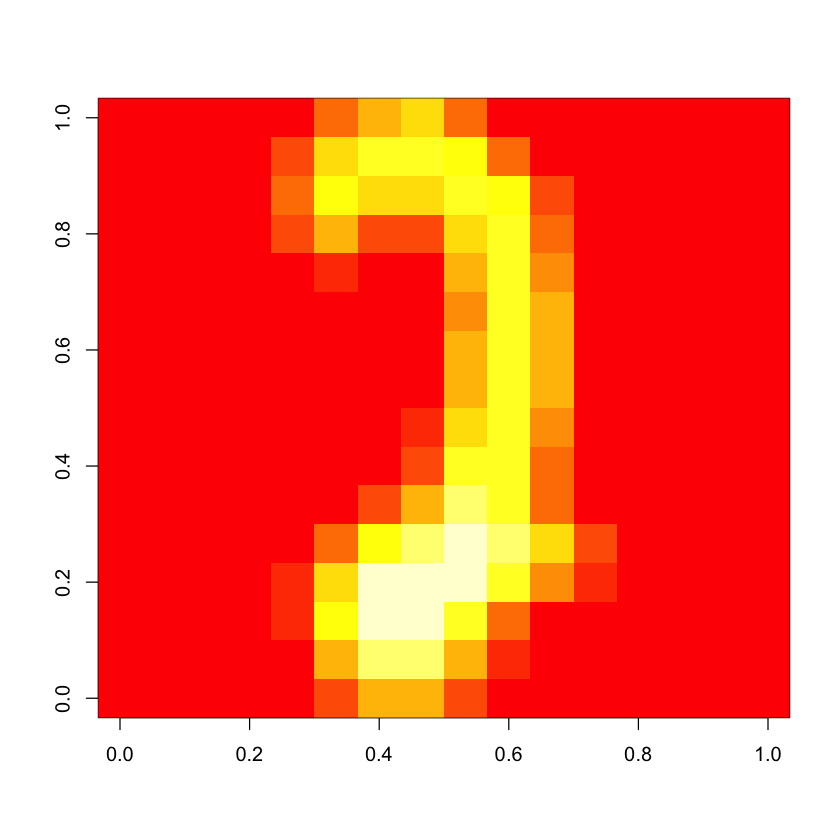

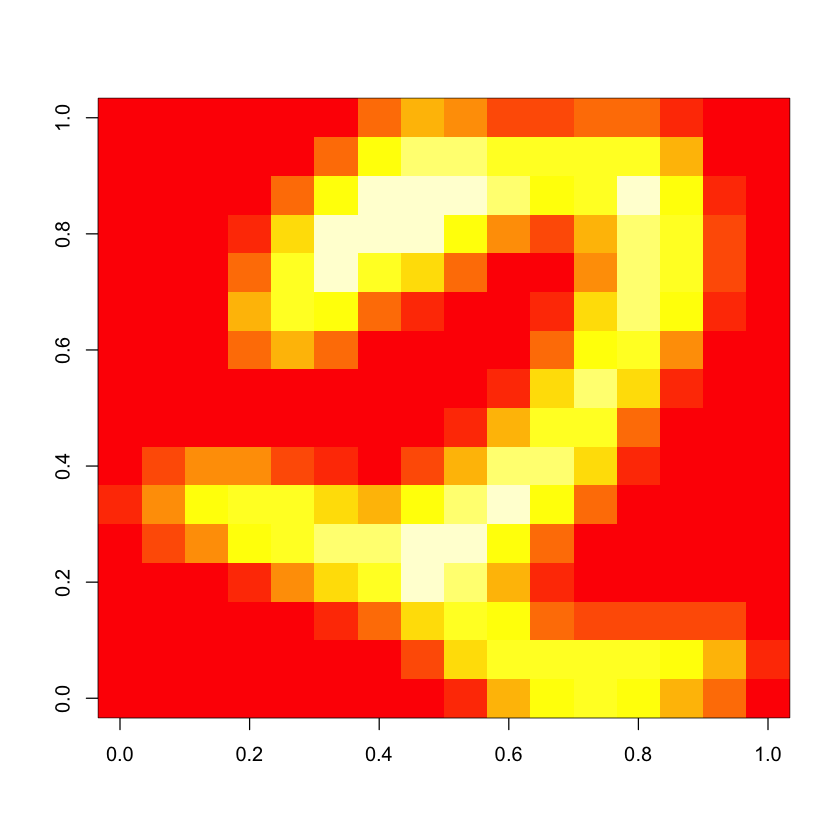

In [9]:
for (i in which(result == 1)) {
  show_image(test_data[, i, 2])
}

## 多クラス分類してみる

In [10]:
acc = c()
formated = c()
for (i in 1:10) {
  label = get_test_num(i)
  p_all = to_max_possiblity(label)
  acc = append(acc, sum(p_all == i) / length(p_all))
  if (i == 10) {
    formated = append(formated, sprintf("Accuracy of %1d: %f", 0, sum(p_all == i) / length(p_all)))
  } else{
    formated = append(formated, sprintf("Accuracy of %1d: %f", i, sum(p_all == i) / length(p_all)))
  }
}
for (s in formated) {
  print(s)
}

[1] "Accuracy of 1: 0.995000"
[1] "Accuracy of 2: 0.845000"
[1] "Accuracy of 3: 0.905000"
[1] "Accuracy of 4: 0.910000"
[1] "Accuracy of 5: 0.810000"
[1] "Accuracy of 6: 0.925000"
[1] "Accuracy of 7: 0.905000"
[1] "Accuracy of 8: 0.825000"
[1] "Accuracy of 9: 0.910000"
[1] "Accuracy of 0: 0.960000"


### 全クラスの平均精度

In [11]:
mean(acc)

[1] 0.899